# Object Detection Metrics

This notebook contains examples of following metrics as explained in the blog [Object Detection Metrice](http://blog.roboflow.com/object-detection-metrics/).

- Intersection over Union (IoU)
- Precision
- Recall
- Average Precision (AP)
- Mean Average Precision (mAP)
- F1 Score

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Input Images

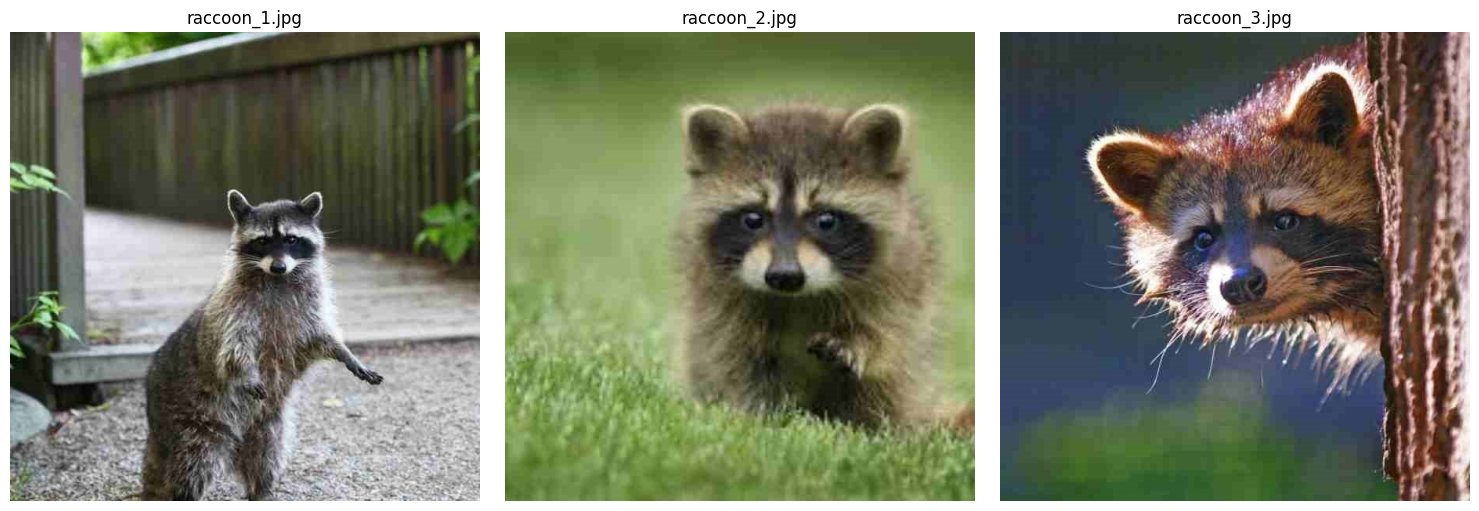

In [2]:
# List of image filenames
image_files = ['raccoon_1.jpg', 'raccoon_2.jpg', 'raccoon_3.jpg']

# Plot images
plt.figure(figsize=(15, 5))
for i, img_file in enumerate(image_files):
    img = cv2.imread(img_file)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
    plt.subplot(1, 3, i+1)
    plt.imshow(img_rgb)
    plt.title(img_file)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Intersection over Union (IoU)

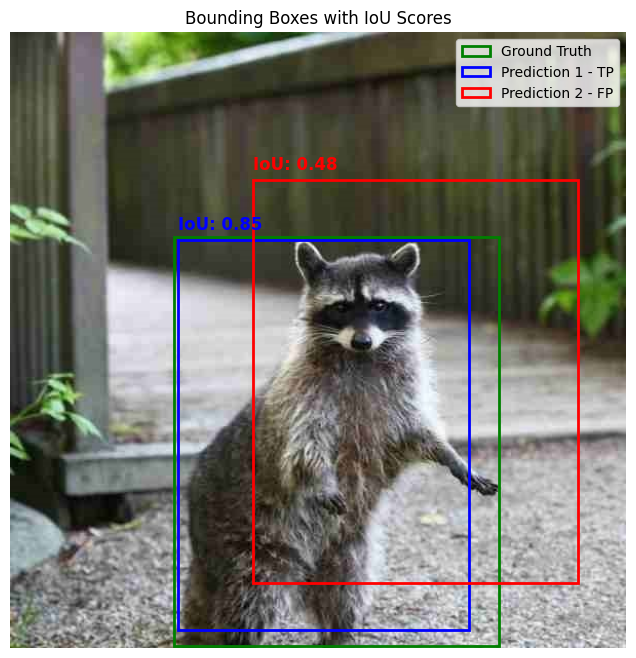

In [3]:
# --- Input Data ---
image_name = "raccoon_1.jpg"
gt_box = [159, 199, 476, 598]  # Ground truth box
pred_boxes = [
    [163, 202, 447, 582],  # TP
    [236, 144, 553, 536]   # FP
]

# --- IoU Function ---
def compute_iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])

    inter_area = max(0, xB - xA) * max(0, yB - yA)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area != 0 else 0

# --- Load Image ---
image = cv2.imread(image_name)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# --- Plotting ---
fig, ax = plt.subplots(1, figsize=(10, 8))
ax.imshow(image)

# Draw Ground Truth Box (Green)
gt_rect = patches.Rectangle(
    (gt_box[0], gt_box[1]),
    gt_box[2] - gt_box[0],
    gt_box[3] - gt_box[1],
    linewidth=2,
    edgecolor='green',
    facecolor='none',
    label='Ground Truth'
)
ax.add_patch(gt_rect)

# Draw Predicted Boxes with IoU and color-coded TP/FP
for i, pred_box in enumerate(pred_boxes):
    iou = compute_iou(gt_box, pred_box)
    is_tp = iou >= 0.5
    color = 'blue' if is_tp else 'red'
    label = f'Prediction {i+1} - {"TP" if is_tp else "FP"}'

    pred_rect = patches.Rectangle(
        (pred_box[0], pred_box[1]),
        pred_box[2] - pred_box[0],
        pred_box[3] - pred_box[1],
        linewidth=2,
        edgecolor=color,
        facecolor='none',
        label=label
    )
    ax.add_patch(pred_rect)
    ax.text(pred_box[0], pred_box[1] - 10, f"IoU: {iou:.2f}", color=color, fontsize=12, weight='bold')

# Legend and Show
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
plt.title("Bounding Boxes with IoU Scores")
plt.axis('off')
plt.show()

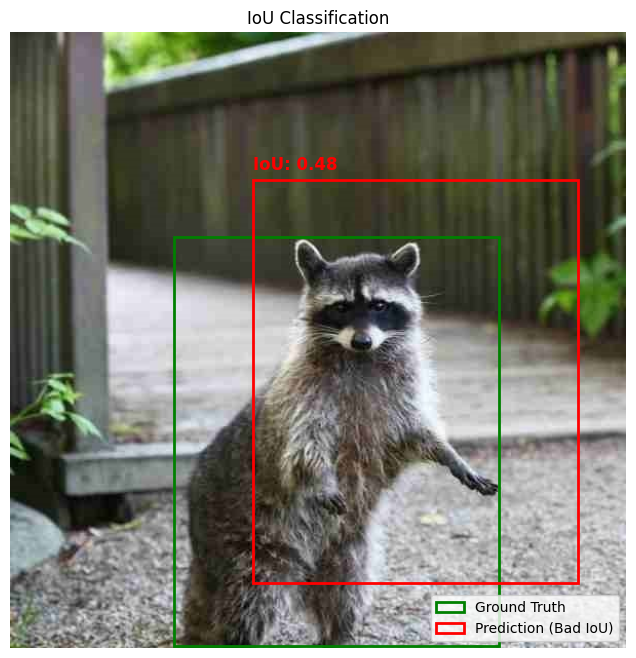

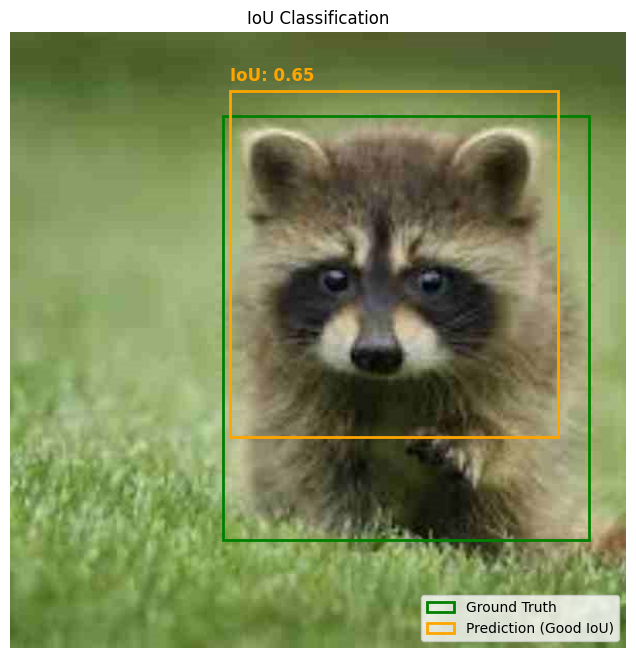

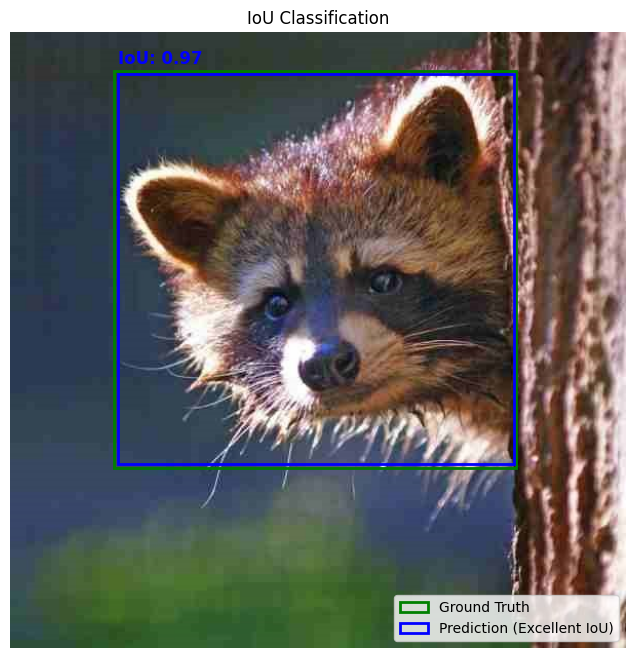

In [4]:
# --- IoU Function ---
def compute_iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])

    inter_area = max(0, xB - xA) * max(0, yB - yA)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area != 0 else 0

# --- IoU Category ---
def categorize_iou(iou):
    if iou < 0.5:
        return "Bad IoU", "red"
    elif iou < 0.75:
        return "Good IoU", "orange"
    else:
        return "Excellent IoU", "blue"

# --- Data ---
image_data = {
    "raccoon_1.jpg": {
        "gt": [159, 199, 476, 598],
        "preds": [
            [236, 144, 553, 536]   # FP
        ]
    },
    "raccoon_2.jpg": {
        "gt": [207, 81, 563, 494],
        "preds": [
            [214, 57, 533, 394]     # FP
        ]
    },
    "raccoon_3.jpg": {
        "gt": [101, 37, 492, 424],
        "preds": [
            [105, 40, 490, 420]    # TP
        ]
    }
}

# --- Visualization ---
for image_name, data in image_data.items():
    # Load and convert image
    image = cv2.imread(image_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(1, figsize=(10, 8))
    ax.imshow(image)

    # Draw ground truth box
    gt = data["gt"]
    gt_rect = patches.Rectangle(
        (gt[0], gt[1]),
        gt[2] - gt[0],
        gt[3] - gt[1],
        linewidth=2,
        edgecolor='green',
        facecolor='none',
        label='Ground Truth'
    )
    ax.add_patch(gt_rect)

    # Draw predicted boxes
    for idx, pred_box in enumerate(data["preds"]):
        iou = compute_iou(gt, pred_box)
        category, color = categorize_iou(iou)
        label = f"Prediction ({category})"

        pred_rect = patches.Rectangle(
            (pred_box[0], pred_box[1]),
            pred_box[2] - pred_box[0],
            pred_box[3] - pred_box[1],
            linewidth=2,
            edgecolor=color,
            facecolor='none',
            label=label
        )
        ax.add_patch(pred_rect)
        ax.text(pred_box[0], pred_box[1] - 10,
                f"IoU: {iou:.2f}",
                color=color, fontsize=12, weight='bold')

    # Set legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc="lower right")
    plt.title(f"IoU Classification")
    plt.axis('off')
    plt.show()


# Precision

## Precision for single image

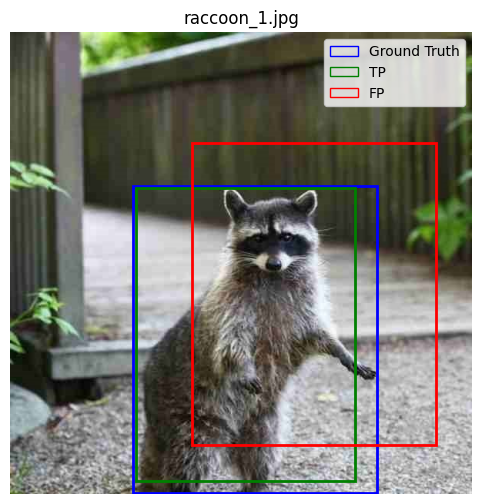

----- Precision for racoon_1.jpg -----
True Positives (TP): 1
False Positives (FP): 1
Precision: 0.50


In [5]:
# IoU calculation function
def compute_iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])

    inter_area = max(0, xB - xA) * max(0, yB - yA)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area else 0

# Data for raccoon_1.jpg
image_name = "raccoon_1.jpg"
gt_box = [159, 199, 476, 598]
pred_boxes = [
     [163, 202, 447, 582],      # TP
     [236, 144, 553, 536]       # FP
]

iou_threshold = 0.50
TP = 0
FP = 0

# Load image
img = cv2.imread(image_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img)
plt.title(f"{image_name}")

# Draw ground truth box (blue)
ax.add_patch(patches.Rectangle(
    (gt_box[0], gt_box[1]),
    gt_box[2] - gt_box[0],
    gt_box[3] - gt_box[1],
    linewidth=2, edgecolor='blue', facecolor='none', label='Ground Truth'))

matched = False
for pred in pred_boxes:
    iou = compute_iou(pred, gt_box)
    if iou >= iou_threshold and not matched:
        color = 'green'
        TP += 1
        matched = True
    else:
        color = 'red'
        FP += 1

    ax.add_patch(patches.Rectangle(
        (pred[0], pred[1]),
        pred[2] - pred[0],
        pred[3] - pred[1],
        linewidth=2, edgecolor=color, facecolor='none'))

# Display legend and image without grid
plt.legend(handles=[
    patches.Patch(edgecolor='blue', facecolor='none', label='Ground Truth'),
    patches.Patch(edgecolor='green', facecolor='none', label='TP'),
    patches.Patch(edgecolor='red', facecolor='none', label='FP')
])
plt.axis('off')
plt.show()

# Calculate and print precision
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
print("----- Precision for racoon_1.jpg -----")
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"Precision: {precision:.2f}")


## Presision across multiple images

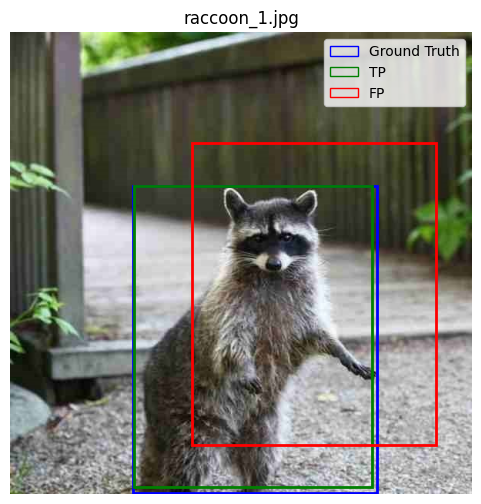

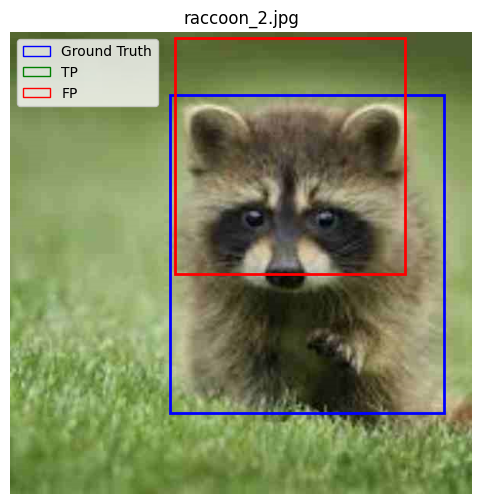

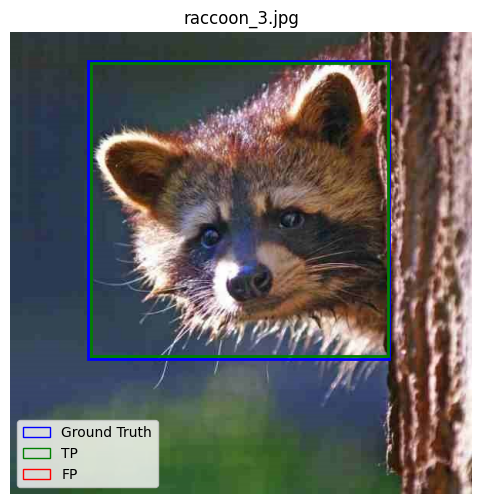

----- Overall Precision (3 images) -----
Total True Positives (TP): 2
Total False Positives (FP): 2
Precision across dataset: 0.50


In [6]:
# Function to compute IoU
def compute_iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])

    inter_area = max(0, xB - xA) * max(0, yB - yA)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area else 0

# Ground truth boxes
image_data = {
    "raccoon_1.jpg": {"gt": [159, 199, 476, 598]},
    "raccoon_2.jpg": {"gt": [207, 81, 563, 494]},
    "raccoon_3.jpg": {"gt": [101, 37, 492, 424]},
}

# Static predicted boxes: Mix of TP and FP
image_data["raccoon_1.jpg"]["preds"] = [
    [160, 200, 470, 590],  # TP
    [236, 144, 553, 536]     # FP
]
image_data["raccoon_2.jpg"]["preds"] = [
    [214, 7, 513, 314]   # FP
]
image_data["raccoon_3.jpg"]["preds"] = [
    [105, 40, 490, 420]    # TP
]

iou_threshold = 0.5
total_TP = 0
total_FP = 0

# Loop through each image
for image_name, data in image_data.items():
    gt_box = data["gt"]
    preds = data["preds"]

    # Load and display image
    img = cv2.imread(image_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(img)
    plt.title(f"{image_name}")

    # Draw ground truth (blue)
    ax.add_patch(patches.Rectangle(
        (gt_box[0], gt_box[1]),
        gt_box[2] - gt_box[0],
        gt_box[3] - gt_box[1],
        linewidth=2, edgecolor='blue', facecolor='none', label='Ground Truth'))

    matched = False
    for pred in preds:
        iou = compute_iou(pred, gt_box)
        if iou >= iou_threshold and not matched:
            color = 'green'
            total_TP += 1
            matched = True
        else:
            color = 'red'
            total_FP += 1

        ax.add_patch(patches.Rectangle(
            (pred[0], pred[1]),
            pred[2] - pred[0],
            pred[3] - pred[1],
            linewidth=2, edgecolor=color, facecolor='none'))

    # Legend
    plt.legend(handles=[
        patches.Patch(edgecolor='blue', facecolor='none', label='Ground Truth'),
        patches.Patch(edgecolor='green', facecolor='none', label='TP'),
        patches.Patch(edgecolor='red', facecolor='none', label='FP')
    ])
    plt.axis('off')  # remove grid and ticks
    plt.show()

# Compute precision
precision = total_TP / (total_TP + total_FP) if (total_TP + total_FP) > 0 else 0
print("----- Overall Precision (3 images) -----")
print(f"Total True Positives (TP): {total_TP}")
print(f"Total False Positives (FP): {total_FP}")
print(f"Precision across dataset: {precision:.2f}")


# Recall

## Recall for single image

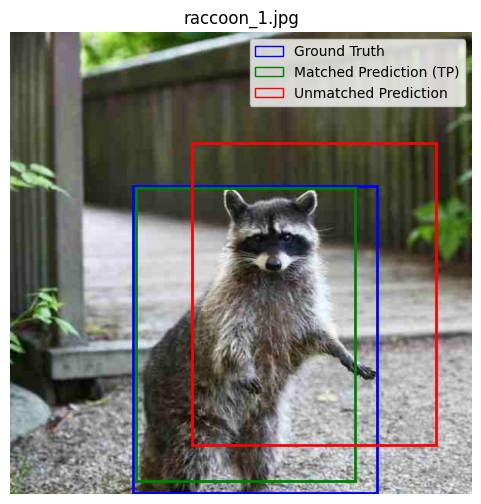

----- Recall for racoon_1.jpg -----
True Positives (TP): 1
False Negatives (FN): 0
Recall: 1.00


In [7]:
# --- IoU Calculation Function ---
def compute_iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])

    inter_area = max(0, xB - xA) * max(0, yB - yA)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area else 0

# --- Data for raccoon_1.jpg ---
image_name = "raccoon_1.jpg"
gt_boxes = [
    [159, 199, 476, 598]  # Just one GT box in this example
]
pred_boxes = [
    [163, 202, 447, 582],      # TP
    [236, 144, 553, 536]       # FP
]

iou_threshold = 0.5
TP = 0
FN = 0

# --- Load and display image ---
img = cv2.imread(image_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img)
plt.title(f"{image_name}")

# --- Track predictions that match any ground truth ---
matched_preds = set()

for gt_idx, gt in enumerate(gt_boxes):
    matched = False
    for pred_idx, pred in enumerate(pred_boxes):
        iou = compute_iou(pred, gt)
        if iou >= iou_threshold and pred_idx not in matched_preds:
            TP += 1
            matched_preds.add(pred_idx)
            color = 'green'
            matched = True
            break
    if not matched:
        FN += 1
        color = 'blue'

    # Draw GT box (always)
    ax.add_patch(patches.Rectangle(
        (gt[0], gt[1]),
        gt[2] - gt[0],
        gt[3] - gt[1],
        linewidth=2, edgecolor='blue', facecolor='none', label='Ground Truth' if gt_idx == 0 else None))

# --- Draw all predictions ---
for idx, pred in enumerate(pred_boxes):
    color = 'green' if idx in matched_preds else 'red'
    ax.add_patch(patches.Rectangle(
        (pred[0], pred[1]),
        pred[2] - pred[0],
        pred[3] - pred[1],
        linewidth=2, edgecolor=color, facecolor='none'))

# --- Legend and Display ---
plt.legend(handles=[
    patches.Patch(edgecolor='blue', facecolor='none', label='Ground Truth'),
    patches.Patch(edgecolor='green', facecolor='none', label='Matched Prediction (TP)'),
    patches.Patch(edgecolor='red', facecolor='none', label='Unmatched Prediction')
])
plt.axis('off')
plt.show()

# --- Recall Calculation ---
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
print("----- Recall for racoon_1.jpg -----")
print(f"True Positives (TP): {TP}")
print(f"False Negatives (FN): {FN}")
print(f"Recall: {recall:.2f}")


## Recall across multiple images

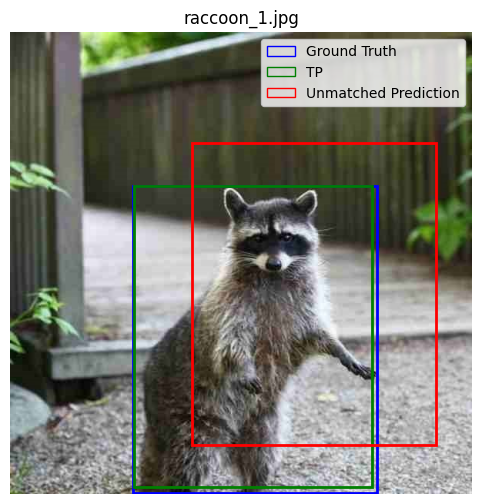

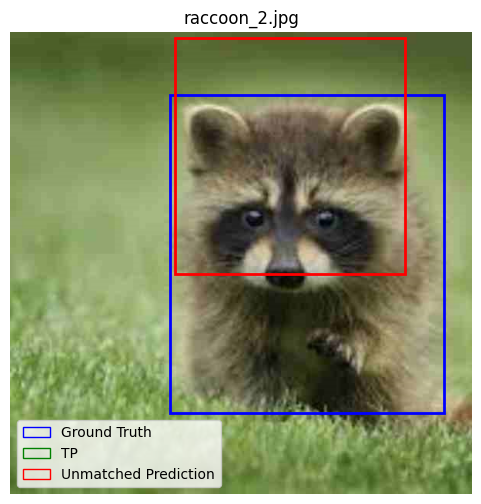

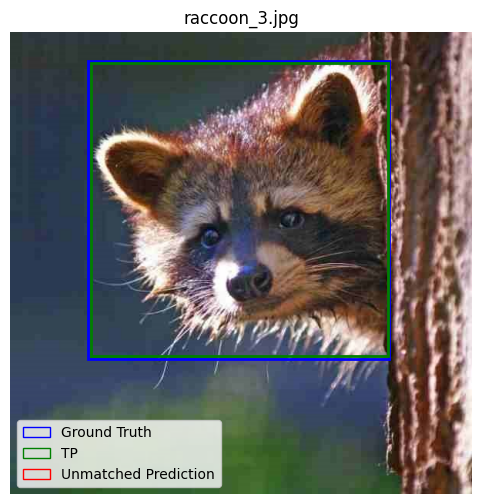

----- Overall Recall (3 images) -----
Total True Positives (TP): 2
Total False Negatives (FN): 1
Recall across dataset: 0.67


In [8]:
# --- IoU Calculation ---
def compute_iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    inter_area = max(0, xB - xA) * max(0, yB - yA)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area else 0

# --- Data for 3 images ---
image_data = {
    "raccoon_1.jpg": {
        "gt": [[159, 199, 476, 598]],
        "preds": [[160, 200, 470, 590], [236, 144, 553, 536]]
    },
    "raccoon_2.jpg": {
        "gt": [[207, 81, 563, 494]],
        "preds": [[214, 7, 513, 314]]
    },
    "raccoon_3.jpg": {
        "gt": [[101, 37, 492, 424]],
        "preds": [[105, 40, 490, 420]]
    }
}

iou_threshold = 0.5
total_TP = 0
total_FN = 0

# --- Evaluate Recall Across Images ---
for image_name, data in image_data.items():
    gt_boxes = data["gt"]
    pred_boxes = data["preds"]
    matched_preds = set()

    # Load and display image
    img = cv2.imread(image_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(img)
    plt.title(f"{image_name}")

    # Check each GT box
    for gt_idx, gt in enumerate(gt_boxes):
        matched = False
        for pred_idx, pred in enumerate(pred_boxes):
            iou = compute_iou(gt, pred)
            if iou >= iou_threshold and pred_idx not in matched_preds:
                matched_preds.add(pred_idx)
                total_TP += 1
                matched = True
                color = 'green'
                break
        if not matched:
            total_FN += 1
            color = 'blue'
        ax.add_patch(patches.Rectangle(
            (gt[0], gt[1]),
            gt[2] - gt[0],
            gt[3] - gt[1],
            linewidth=2, edgecolor='blue', facecolor='none', label='GT' if gt_idx == 0 else None))

    # Draw predictions
    for idx, pred in enumerate(pred_boxes):
        color = 'green' if idx in matched_preds else 'red'
        ax.add_patch(patches.Rectangle(
            (pred[0], pred[1]),
            pred[2] - pred[0],
            pred[3] - pred[1],
            linewidth=2, edgecolor=color, facecolor='none'))

    plt.legend(handles=[
        patches.Patch(edgecolor='blue', facecolor='none', label='Ground Truth'),
        patches.Patch(edgecolor='green', facecolor='none', label='TP'),
        patches.Patch(edgecolor='red', facecolor='none', label='Unmatched Prediction')
    ])
    plt.axis('off')
    plt.show()

# --- Recall Calculation ---
recall = total_TP / (total_TP + total_FN) if (total_TP + total_FN) > 0 else 0
print("----- Overall Recall (3 images) -----")
print(f"Total True Positives (TP): {total_TP}")
print(f"Total False Negatives (FN): {total_FN}")
print(f"Recall across dataset: {recall:.2f}")


# Average Precision and mAP Example

## Increasing Recall Method

mAP@0.5 = 0.69


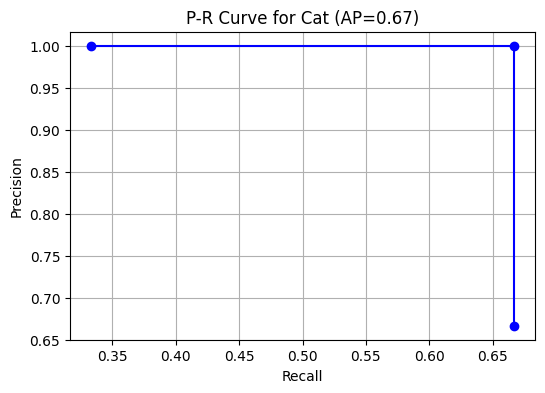

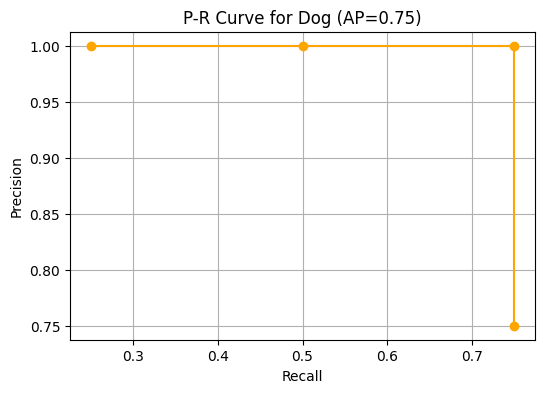

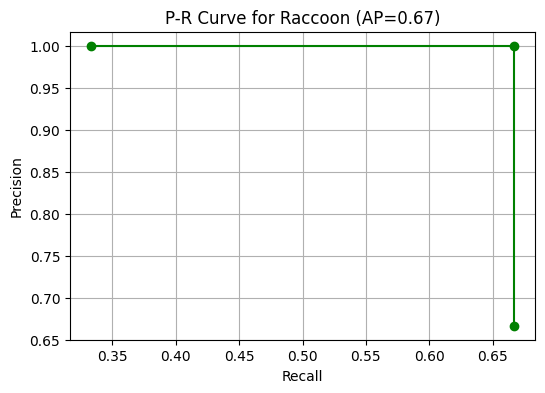

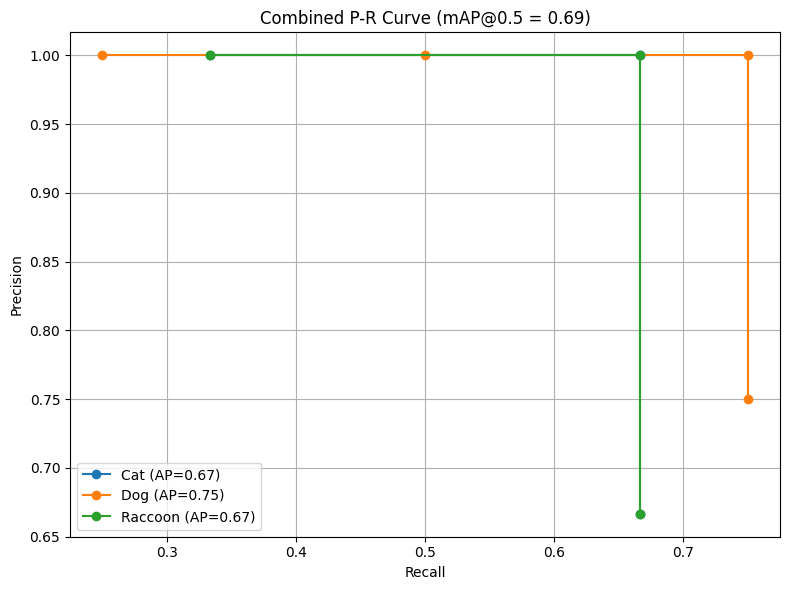

In [9]:
# 1. Ground Truth Boxes
ground_truths = {
    "image_1.jpg":  ("Cat", [10, 10, 50, 50]),
    "image_2.jpg":  ("Dog", [20, 20, 60, 60]),
    "image_3.jpg":  ("Raccoon", [30, 30, 70, 70]),
    "image_4.jpg":  ("Dog", [15, 15, 55, 55]),
    "image_5.jpg":  ("Cat", [25, 25, 65, 65]),
    "image_6.jpg":  ("Raccoon", [40, 40, 80, 80]),
    "image_7.jpg":  ("Dog", [30, 30, 70, 70]),
    "image_8.jpg":  ("Cat", [35, 35, 75, 75]),
    "image_9.jpg":  ("Raccoon", [20, 20, 60, 60]),
    "image_10.jpg": ("Dog", [50, 50, 90, 90]),
}

# 2. Predictions (image, class, box, confidence)
predictions = [
    ("image_1.jpg",  "Cat", [12, 12, 48, 48], 0.9),
    ("image_2.jpg",  "Dog", [22, 22, 58, 58], 0.8),
    ("image_3.jpg",  "Raccoon", [32, 32, 68, 68], 0.85),
    ("image_4.jpg",  "Dog", [0, 0, 30, 30], 0.7),
    ("image_5.jpg",  "Cat", [10, 10, 30, 30], 0.6),
    ("image_6.jpg",  "Raccoon", [42, 42, 78, 78], 0.9),
    ("image_7.jpg",  "Dog", [28, 28, 68, 68], 0.95),
    ("image_8.jpg",  "Cat", [36, 36, 76, 76], 0.88),
    ("image_9.jpg",  "Raccoon", [10, 10, 40, 40], 0.5),
    ("image_10.jpg", "Dog", [50, 50, 90, 90], 0.92),
]

# 3. IoU calculation
def compute_iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    inter_area = max(0, xB - xA) * max(0, yB - yA)
    if inter_area == 0:
        return 0.0
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area

# 4. AP calculation using increasing recall
def compute_ap(recalls, precisions):
    # Create a dictionary to store the maximum precision for each recall value
    pr_dict = {}
    for r, p in zip(recalls, precisions):
        if r not in pr_dict or p > pr_dict[r]:
            pr_dict[r] = p

    # Sort recall values in ascending order (increasing)
    sorted_recalls = sorted(pr_dict.keys())
    sorted_precisions = [pr_dict[r] for r in sorted_recalls]

    # Add recall=0.0 with maximum precision if not present
    if 0.0 not in pr_dict:
        # Insert at beginning
        sorted_recalls.insert(0, 0.0)
        # Use the maximum precision as the interpolated value at recall=0
        sorted_precisions.insert(0, max(sorted_precisions) if sorted_precisions else 0.0)

    # Apply interpolation (VOC-style)
    for i in range(len(sorted_precisions)-2, -1, -1):
        sorted_precisions[i] = max(sorted_precisions[i], sorted_precisions[i+1])

    # Compute AP using increasing recall formula
    ap = 0.0
    for i in range(1, len(sorted_recalls)):
        delta_r = sorted_recalls[i] - sorted_recalls[i-1]
        ap += delta_r * sorted_precisions[i]

    return ap

# 5. Evaluate PR and AP
classes = ["Cat", "Dog", "Raccoon"]
iou_threshold = 0.5
results = {}

for cls in classes:
    cls_preds = [(img, box, conf) for img, c, box, conf in predictions if c == cls]
    cls_preds.sort(key=lambda x: x[2], reverse=True)
    matched_gt = set()
    tp_fp = []

    for img, box_pred, conf in cls_preds:
        gt_cls, gt_box = ground_truths[img]
        if gt_cls != cls:
            tp_fp.append((conf, 0))
            continue
        iou = compute_iou(box_pred, gt_box)
        if iou >= iou_threshold and img not in matched_gt:
            tp_fp.append((conf, 1))  # TP
            matched_gt.add(img)
        else:
            tp_fp.append((conf, 0))  # FP

    tp = 0
    fp = 0
    precisions = []
    recalls = []
    total_gt = sum(1 for _, (gt_cls, _) in ground_truths.items() if gt_cls == cls)

    for conf, is_tp in tp_fp:
        if is_tp:
            tp += 1
        else:
            fp += 1
        precisions.append(tp / (tp + fp))
        recalls.append(tp / total_gt)

    ap = compute_ap(recalls, precisions)
    results[cls] = {"AP": ap, "precision": precisions, "recall": recalls}



# 6. Compute and print mAP
map_50 = np.mean([res["AP"] for res in results.values()])
print(f"mAP@0.5 = {map_50:.2f}")

# 7. Plot separate P-R curves
# Color map for each class
color_map = {
    "Cat": "blue",
    "Dog": "orange",
    "Raccoon": "green"
}

for cls, res in results.items():
    plt.figure(figsize=(6, 4))
    plt.plot(res["recall"], res["precision"], marker='o', color=color_map[cls])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"P-R Curve for {cls} (AP={res['AP']:.2f})")
    plt.grid(True)
    plt.ylim()
    plt.xlim()
    plt.show()

# 8. Combined mAP P-R plot
plt.figure(figsize=(8, 6))
for cls, res in results.items():
    plt.plot(res["recall"], res["precision"], marker='o', label=f"{cls} (AP={res['AP']:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Combined P-R Curve (mAP@0.5 = {map_50:.2f})")
plt.legend()
plt.grid(True)
plt.ylim()
plt.xlim()
plt.tight_layout()
plt.show()


## Decreasing Recall Method

Cat - AP: 0.67
Dog - AP: 0.75
Raccoon - AP: 0.67
mAP@0.5: 0.69


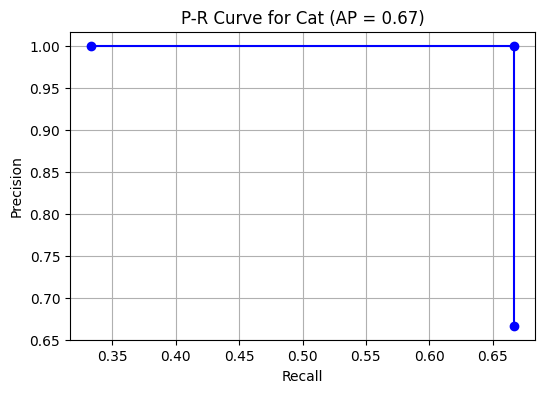

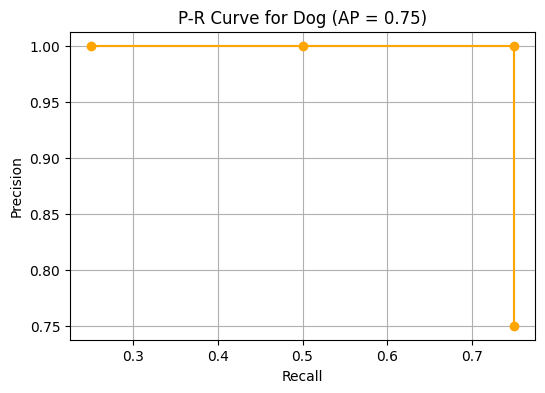

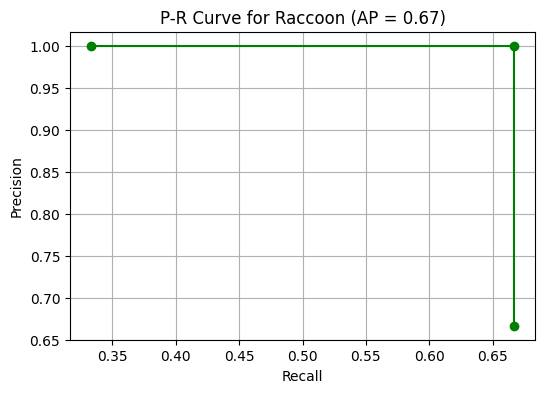

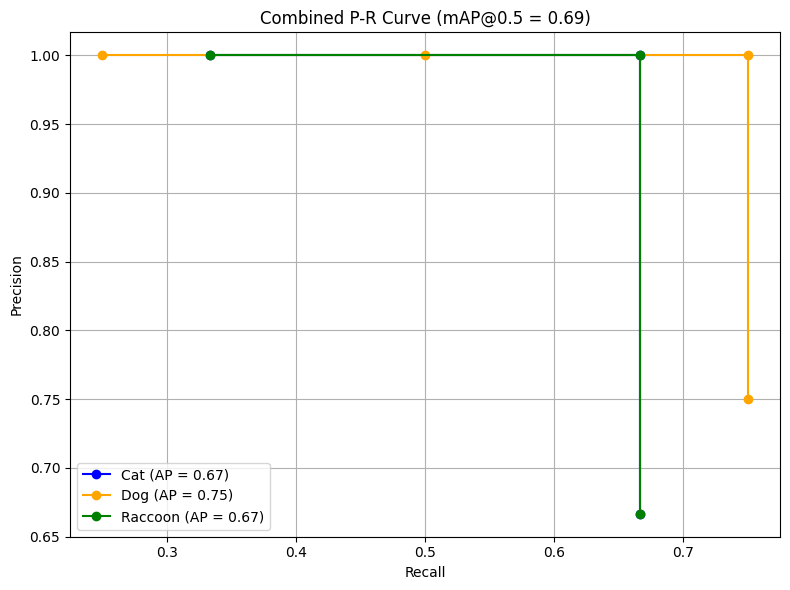

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Ground Truth Boxes
ground_truths = {
    "image_1.jpg":  ("Cat", [10, 10, 50, 50]),
    "image_2.jpg":  ("Dog", [20, 20, 60, 60]),
    "image_3.jpg":  ("Raccoon", [30, 30, 70, 70]),
    "image_4.jpg":  ("Dog", [15, 15, 55, 55]),
    "image_5.jpg":  ("Cat", [25, 25, 65, 65]),
    "image_6.jpg":  ("Raccoon", [40, 40, 80, 80]),
    "image_7.jpg":  ("Dog", [30, 30, 70, 70]),
    "image_8.jpg":  ("Cat", [35, 35, 75, 75]),
    "image_9.jpg":  ("Raccoon", [20, 20, 60, 60]),
    "image_10.jpg": ("Dog", [50, 50, 90, 90]),
}

# Predictions
predictions = [
    ("image_1.jpg",  "Cat", [12, 12, 48, 48], 0.9),
    ("image_2.jpg",  "Dog", [22, 22, 58, 58], 0.8),
    ("image_3.jpg",  "Raccoon", [32, 32, 68, 68], 0.85),
    ("image_4.jpg",  "Dog", [0, 0, 30, 30], 0.7),
    ("image_5.jpg",  "Cat", [10, 10, 30, 30], 0.6),
    ("image_6.jpg",  "Raccoon", [42, 42, 78, 78], 0.9),
    ("image_7.jpg",  "Dog", [28, 28, 68, 68], 0.95),
    ("image_8.jpg",  "Cat", [36, 36, 76, 76], 0.88),
    ("image_9.jpg",  "Raccoon", [10, 10, 40, 40], 0.5),
    ("image_10.jpg", "Dog", [50, 50, 90, 90], 0.92),
]

# IoU function
def compute_iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    inter_area = max(0, xB - xA) * max(0, yB - yA)
    if inter_area == 0:
        return 0.0
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area

# Alternate AP calculation (decreasing recall form)
def compute_ap_decreasing_recall(recalls, precisions):
 # Create a dictionary to store the maximum precision for each recall value
    pr_dict = {}
    for r, p in zip(recalls, precisions):
        if r not in pr_dict or p > pr_dict[r]:
            pr_dict[r] = p

    # Sort recall values in descending order (decreasing)
    sorted_recalls = sorted(pr_dict.keys(), reverse=True)
    sorted_precisions = [pr_dict[r] for r in sorted_recalls]

    # Add recall=0.0 with precision=0.0 if not present
    if sorted_recalls[-1] != 0.0:
        sorted_recalls.append(0.0)
        sorted_precisions.append(0.0)

    # Compute AP using decreasing recall formula
    ap = 0.0
    for i in range(len(sorted_recalls) - 1):
        delta_r = sorted_recalls[i] - sorted_recalls[i + 1]
        ap += delta_r * sorted_precisions[i]

    return ap

# Evaluation
classes = ["Cat", "Dog", "Raccoon"]
iou_threshold = 0.5
results = {}

for cls in classes:
    cls_preds = [(img, box, conf) for img, c, box, conf in predictions if c == cls]
    cls_preds.sort(key=lambda x: x[2], reverse=True)
    matched_gt = set()
    tp_fp = []

    for img, box_pred, conf in cls_preds:
        gt_cls, gt_box = ground_truths[img]
        if gt_cls != cls:
            tp_fp.append((conf, 0))
            continue
        iou = compute_iou(box_pred, gt_box)
        if iou >= iou_threshold and img not in matched_gt:
            tp_fp.append((conf, 1))
            matched_gt.add(img)
        else:
            tp_fp.append((conf, 0))

    tp = 0
    fp = 0
    precisions = []
    recalls = []
    total_gt = sum(1 for _, (gt_cls, _) in ground_truths.items() if gt_cls == cls)

    for conf, is_tp in tp_fp:
        if is_tp:
            tp += 1
        else:
            fp += 1
        precisions.append(tp / (tp + fp))
        recalls.append(tp / total_gt)

    ap = compute_ap_decreasing_recall(recalls, precisions)
    results[cls] = {"AP": ap, "precision": precisions, "recall": recalls}

# Compute mAP
map_50 = np.mean([res["AP"] for res in results.values()])
results["mAP@0.5"] = map_50

# Print Results
for cls in classes:
    print(f"{cls} - AP: {results[cls]['AP']:.2f}")
print(f"mAP@0.5: {results['mAP@0.5']:.2f}")

# Visualization
color_map = {"Cat": "blue", "Dog": "orange", "Raccoon": "green"}

# Individual PR Curves
for cls in classes:
    res = results[cls]
    plt.figure(figsize=(6, 4))
    plt.plot(res["recall"], res["precision"], marker='o', linestyle='-', color=color_map[cls])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"P-R Curve for {cls} (AP = {res['AP']:.2f})")
    plt.grid(True)
    plt.ylim()
    plt.xlim()
    plt.show()

# Combined PR Curve
plt.figure(figsize=(8, 6))
for cls in classes:
    res = results[cls]
    plt.plot(res["recall"], res["precision"], marker='o', linestyle='-', label=f"{cls} (AP = {res['AP']:.2f})", color=color_map[cls])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Combined P-R Curve (mAP@0.5 = {map_50:.2f})")
plt.legend()
plt.grid(True)
plt.ylim()
plt.xlim()
plt.tight_layout()
plt.show()


# F1 Score

In [11]:
from sklearn.metrics import confusion_matrix

# 1. Ground Truth Boxes
ground_truths = {
    "image_1.jpg":  ("Cat", [10, 10, 50, 50]),
    "image_2.jpg":  ("Dog", [20, 20, 60, 60]),
    "image_3.jpg":  ("Raccoon", [30, 30, 70, 70]),
    "image_4.jpg":  ("Dog", [15, 15, 55, 55]),
    "image_5.jpg":  ("Cat", [25, 25, 65, 65]),
    "image_6.jpg":  ("Raccoon", [40, 40, 80, 80]),
    "image_7.jpg":  ("Dog", [30, 30, 70, 70]),
    "image_8.jpg":  ("Cat", [35, 35, 75, 75]),
    "image_9.jpg":  ("Raccoon", [20, 20, 60, 60]),
    "image_10.jpg": ("Dog", [50, 50, 90, 90]),
}

# 2. Predictions
predictions = [
    ("image_1.jpg",  "Cat", [12, 12, 48, 48], 0.9),
    ("image_2.jpg",  "Dog", [22, 22, 58, 58], 0.8),
    ("image_3.jpg",  "Raccoon", [32, 32, 68, 68], 0.85),
    ("image_4.jpg",  "Dog", [0, 0, 30, 30], 0.7),
    ("image_5.jpg",  "Cat", [10, 10, 30, 30], 0.6),
    ("image_6.jpg",  "Raccoon", [42, 42, 78, 78], 0.9),
    ("image_7.jpg",  "Dog", [28, 28, 68, 68], 0.95),
    ("image_8.jpg",  "Cat", [36, 36, 76, 76], 0.88),
    ("image_9.jpg",  "Raccoon", [10, 10, 40, 40], 0.5),
    ("image_10.jpg", "Dog", [50, 50, 90, 90], 0.92),
]

# 3. IoU function
def compute_iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    inter_area = max(0, xB - xA) * max(0, yB - yA)
    if inter_area == 0:
        return 0.0
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area

# 4. Best predictions
image_preds = {}
for img, pred_class, box, conf in predictions:
    if img not in image_preds or conf > image_preds[img][1]:
        image_preds[img] = (pred_class, conf, box)

# 5. Collect true and predicted labels
class_labels = ["Cat", "Dog", "Raccoon"]
true_labels = []
pred_labels = []
iou_threshold = 0.5

for img in ground_truths:
    true_class, true_box = ground_truths[img]
    if img in image_preds:
        pred_class, conf, pred_box = image_preds[img]
        iou = compute_iou(pred_box, true_box)
        if iou >= iou_threshold and pred_class == true_class:
            pred_labels.append(pred_class)  # TP
        else:
            pred_labels.append(pred_class)  # FP or wrong class
    else:
        pred_labels.append("None")  # Missed
    true_labels.append(true_class)

# 6. Calculate F1 scores
cm = confusion_matrix(true_labels, pred_labels, labels=class_labels)

print("F1 Scores per class:")
for i, cls in enumerate(class_labels):
    tp = cm[i, i]
    fp = cm[:, i].sum() - tp
    fn = cm[i, :].sum() - tp
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    print(f"{cls}: F1 Score = {f1:.2f}")


F1 Scores per class:
Cat: F1 Score = 1.00
Dog: F1 Score = 1.00
Raccoon: F1 Score = 1.00
